# Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
import logging
logging.getLogger().setLevel(logging.CRITICAL)

# MI

In [2]:
# exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData\\'
exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210908\\SplitData\\'
MI_filenames = os.listdir(exp_folder+'MI\\')
STA_filenames = os.listdir(exp_folder+'STA\\')

In [3]:
name = 'typeE'

cn = 30
MI_Indexes = [5,7,6,8,9, 2,3,4]
STA_Indexes = [5,7,6,8,9, 2,3,4]
TK_Indexes = [10,12,11,13,14]
legend = ['M=10;C='+str(C) for C in [0.05,0.1,1.5,0.2,0.3]]+['C=0.2;M='+str(M) for M in [2,6,13]]


In [4]:
MI_Data = {}
STA_Data = {}
TK_Data = {}

for i in range(len(legend)):
    try:
        print(legend[i]+' ; '+MI_filenames[MI_Indexes[i]])
    except: continue
    loadfiles = np.load(exp_folder+'MI\\'+MI_filenames[MI_Indexes[i]], allow_pickle=True)
    if i == 0: MI_Data['timeshift'] = loadfiles['timeshift'][()]
    MI_Data[legend[i]] = loadfiles['Information_cell'][()][cn-1]
print('\n')
        
for i in range(len(legend)):
    try:
        print(legend[i]+' ; '+STA_filenames[STA_Indexes[i]])
    except: continue
    loadfiles = np.load(exp_folder+'STA\\'+STA_filenames[STA_Indexes[i]], allow_pickle=True)
    if i == 0: STA_Data['timeshift'] = loadfiles['timeshift'][()]
    STA_Data[legend[i]] = loadfiles['STA_cell'][()][cn-1]
print('\n')
    
for i in range(len(legend)):
    try:
        print(legend[i]+' ; '+STA_filenames[TK_Indexes[i]])
    except: continue
    loadfiles = np.load(exp_folder+'STA\\'+STA_filenames[TK_Indexes[i]], allow_pickle=True)
    if i == 0: TK_Data['timeshift'] = loadfiles['timeshift'][()]
    TK_Data[legend[i]] = loadfiles['STA_cell'][()][cn-1]

M=10;C=0.05 ; MIperSpike_diode_OU_tau=500ms_cutoff=1_mean=10_amp=0.5_11-Aug-2021_0.npz
M=10;C=0.1 ; MIperSpike_diode_OU_tau=500ms_cutoff=1_mean=10_amp=1_11-Aug-2021_0.npz
M=10;C=1.5 ; MIperSpike_diode_OU_tau=500ms_cutoff=1_mean=10_amp=1.5_11-Aug-2021_0.npz
M=10;C=0.2 ; MIperSpike_diode_OU_tau=500ms_cutoff=1_mean=10_amp=2_11-Aug-2021_0.npz
M=10;C=0.3 ; MIperSpike_diode_OU_tau=500ms_cutoff=1_mean=10_amp=3_11-Aug-2021_0.npz
C=0.2;M=2 ; MIperSpike_diode_OU_tau=500ms_cutoff=1_coeff=0.2_11-Aug-2021_0.npz
C=0.2;M=6 ; MIperSpike_diode_OU_tau=500ms_cutoff=1_coeff=0.6_11-Aug-2021_0.npz
C=0.2;M=13 ; MIperSpike_diode_OU_tau=500ms_cutoff=1_coeff=1.3_11-Aug-2021_0.npz


M=10;C=0.05 ; STA_diode_OU_tau=500ms_cutoff=1_mean=10_amp=0.5_11-Aug-2021_0.npz
M=10;C=0.1 ; STA_diode_OU_tau=500ms_cutoff=1_mean=10_amp=1_11-Aug-2021_0.npz
M=10;C=1.5 ; STA_diode_OU_tau=500ms_cutoff=1_mean=10_amp=1.5_11-Aug-2021_0.npz
M=10;C=0.2 ; STA_diode_OU_tau=500ms_cutoff=1_mean=10_amp=2_11-Aug-2021_0.npz
M=10;C=0.3 ; STA_diode

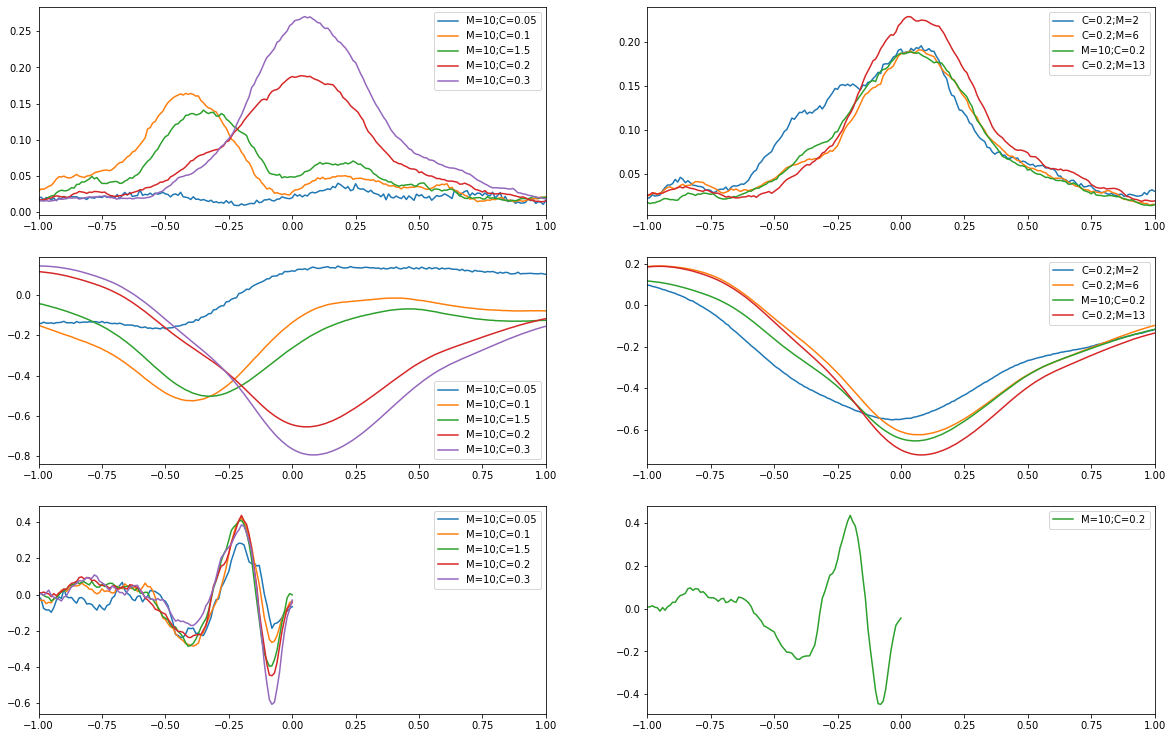

In [5]:
fig, ax = plt.subplots(3,2)
cmind=0
useless = 0
for i in range(5):
    try: 
        ax[0,0].plot(MI_Data['timeshift'], MI_Data[legend[i]], label = legend[i], color = plt.cm.tab10(cmind))
    except: useless = 0
    try: 
        ax[1,0].plot(MI_Data['timeshift'], STA_Data[legend[i]], label = legend[i], color = plt.cm.tab10(cmind))
    except: useless = 0
    try: 
        ax[2,0].plot(MI_Data['timeshift'][:101], TK_Data[legend[i]][:101], label = legend[i], color = plt.cm.tab10(cmind))
    except: useless = 0
    cmind += 1
cmind=0
for i in [5,6,3,7]:
    try: 
        ax[0,1].plot(MI_Data['timeshift'], MI_Data[legend[i]], label = legend[i], color = plt.cm.tab10(cmind))
    except: useless = 0
    try: 
        ax[1,1].plot(MI_Data['timeshift'], STA_Data[legend[i]], label = legend[i], color = plt.cm.tab10(cmind))
    except: useless = 0
    try: 
        ax[2,1].plot(MI_Data['timeshift'][:101], TK_Data[legend[i]][:101], label = legend[i], color = plt.cm.tab10(cmind))
    except: useless = 0
    cmind += 1

for axi in ax.flatten():
    axi.legend()
    axi.set_xlim([-1,1])
fig.set_size_inches(20, 13)

In [7]:
MI_data_df = pd.DataFrame(MI_Data)
STA_data_df = pd.DataFrame(STA_Data)
TK_data_df = pd.DataFrame(TK_Data)
with pd.ExcelWriter('D:\\GoogleDrive\\retina\\ContrastPaper\\4OriginPlot\\'+name+'.xlsx') as writer:
    MI_data_df.to_excel(writer,'MI',float_format='%.6f') # float_format 控制精度
    STA_data_df.to_excel(writer,'STA',float_format='%.6f') # float_format 控制精度
    TK_data_df.to_excel(writer,'TK',float_format='%.6f') # float_format 控制精度